In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
tesla = yf.Ticker("TSLA")

In [6]:
tesla_data = tesla.history(period="max")

In [7]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

In [9]:
# Display the first five rows of the DataFrame
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [25]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

data_tesla = requests.get(url).text    

soup = BeautifulSoup(data_tesla,'html.parser')

In [26]:
# Find the table in the HTML
table = soup.find_all('table')[1] 

# Create a dataframe from the table
tesla_revenue = pd.read_html(str(table), header=0)[0]

# Rename the columns
tesla_revenue.columns = ['Date', 'Revenue']

#Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

# Drop rows with missing values
tesla_revenue.dropna(inplace=True)

# Remove rows where Revenue is empty
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Print the last 5 rows of the dataframe
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [27]:
# Question 3

gamestop = yf.Ticker("GME")
#print(gme.info)

In [29]:
gme_data = gamestop.history(period="max")

In [33]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)
print(gme_data.head)

<bound method NDFrame.head of            Date       Open       High        Low      Close    Volume  \
0    2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000   
1    2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600   
2    2002-02-15   1.683251   1.687459   1.658002   1.674834   8389600   
3    2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400   
4    2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800   
...         ...        ...        ...        ...        ...       ...   
5581 2024-04-17  10.440000  10.590000  10.300000  10.300000   2096700   
5582 2024-04-18  10.320000  10.630000  10.270000  10.310000   2175400   
5583 2024-04-19  10.200000  10.500000  10.200000  10.420000   2455100   
5584 2024-04-22  10.410000  10.450000  10.010000  10.010000   3261000   
5585 2024-04-23  10.050000  10.280000  10.010000  10.160000   2476819   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0

In [38]:
#Question 4


url_gme ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

data_gme  = requests.get(url_gme).text

soup_gme = BeautifulSoup(data_gme,'html.parser')

# Find the table in the HTML
table_gme = soup_gme.find_all('table')[1] 

# Create a dataframe from the table
gme_revenue = pd.read_html(str(table_gme), header=0)[0]

# Rename the columns
gme_revenue.columns = ['Date', 'Revenue']

#Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

# Drop rows with missing values
gme_revenue.dropna(inplace=True)

# Remove rows where Revenue is empty
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Print the last 5 rows of the dataframe
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


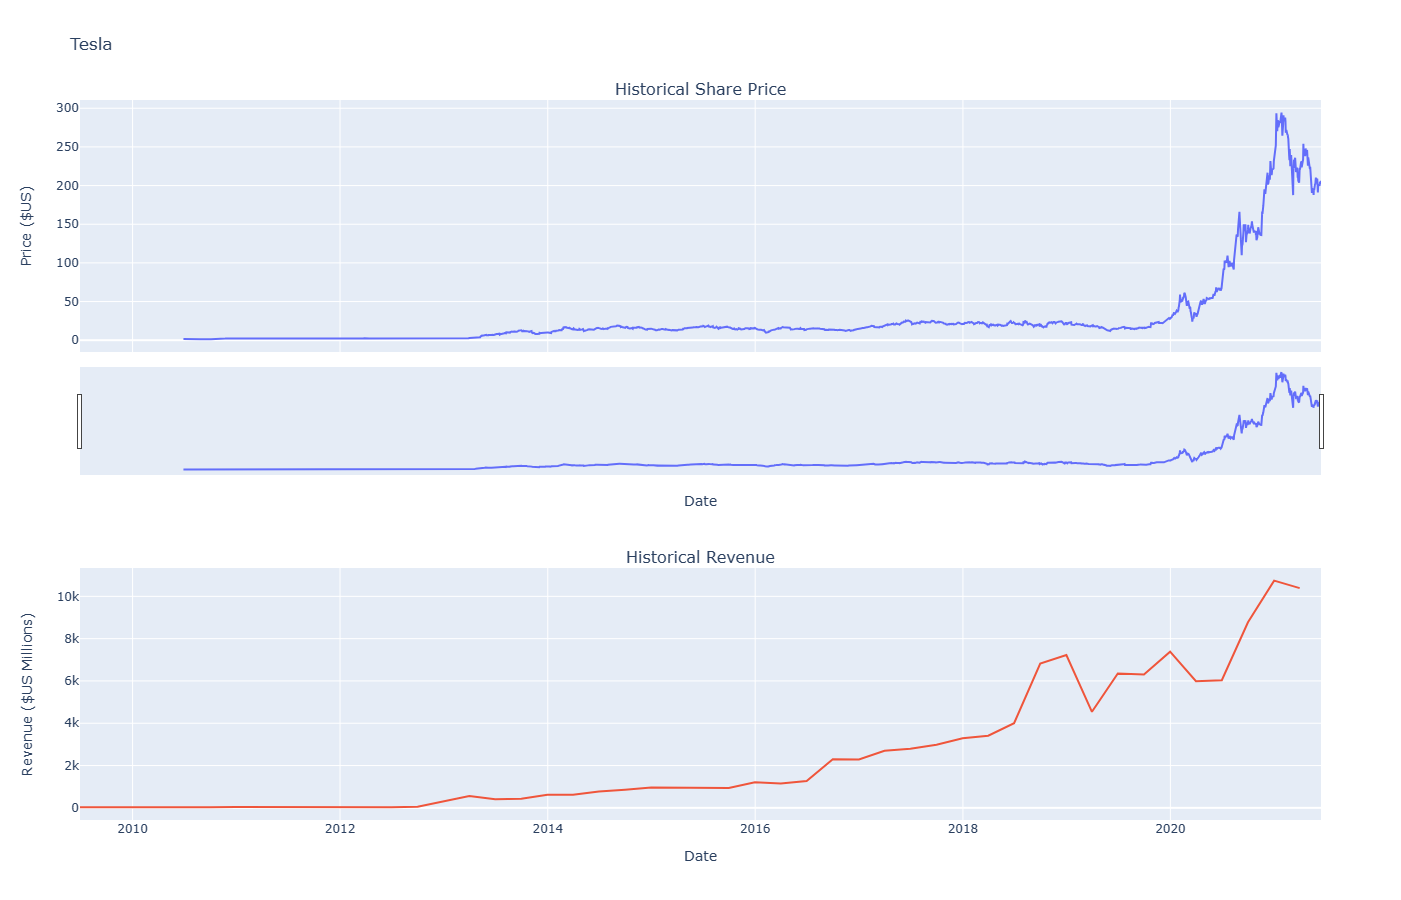

In [40]:
#Question 5

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()


# Now you can call this function with your data and title
make_graph(tesla_data, tesla_revenue, 'Tesla')

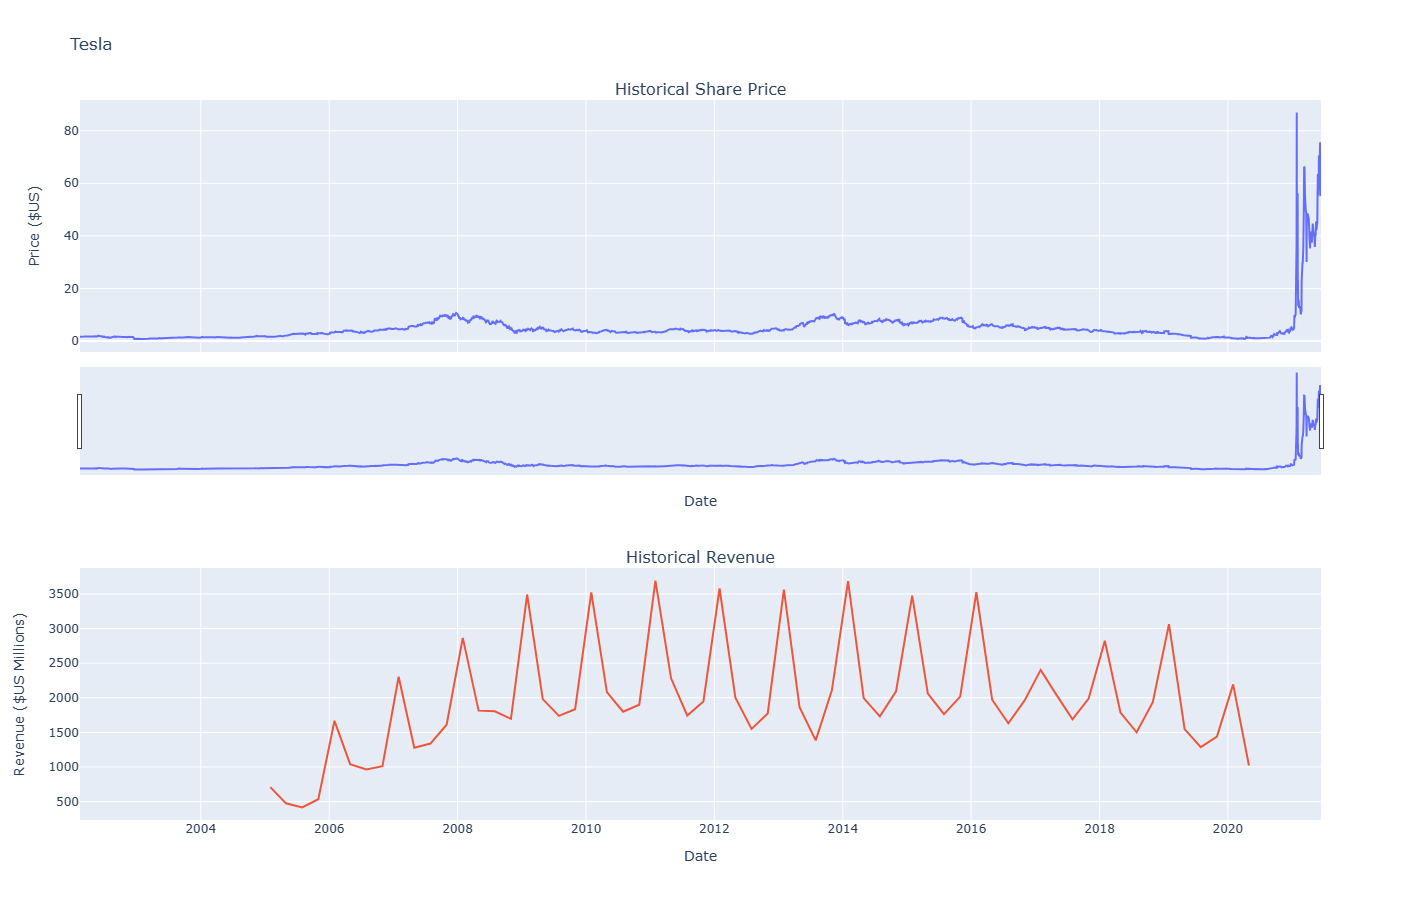

In [41]:
#Question 6

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()


# Now you can call this function with your data and title
make_graph(gme_data, gme_revenue, 'Tesla')